In [1]:
#Basic dataset from sklearn
from sklearn import datasets
import pandas as pd
import numpy as np
from scipy.stats import mode

iris = datasets.load_iris()

In [2]:
for key in iris.keys():
    print(key)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [3]:
data = pd.DataFrame(data = iris.data,columns = iris.feature_names)
data['target'] = iris.target
data['species'] = iris.target_names[iris.target]

In [4]:
pd.set_option('display.max_rows',None)

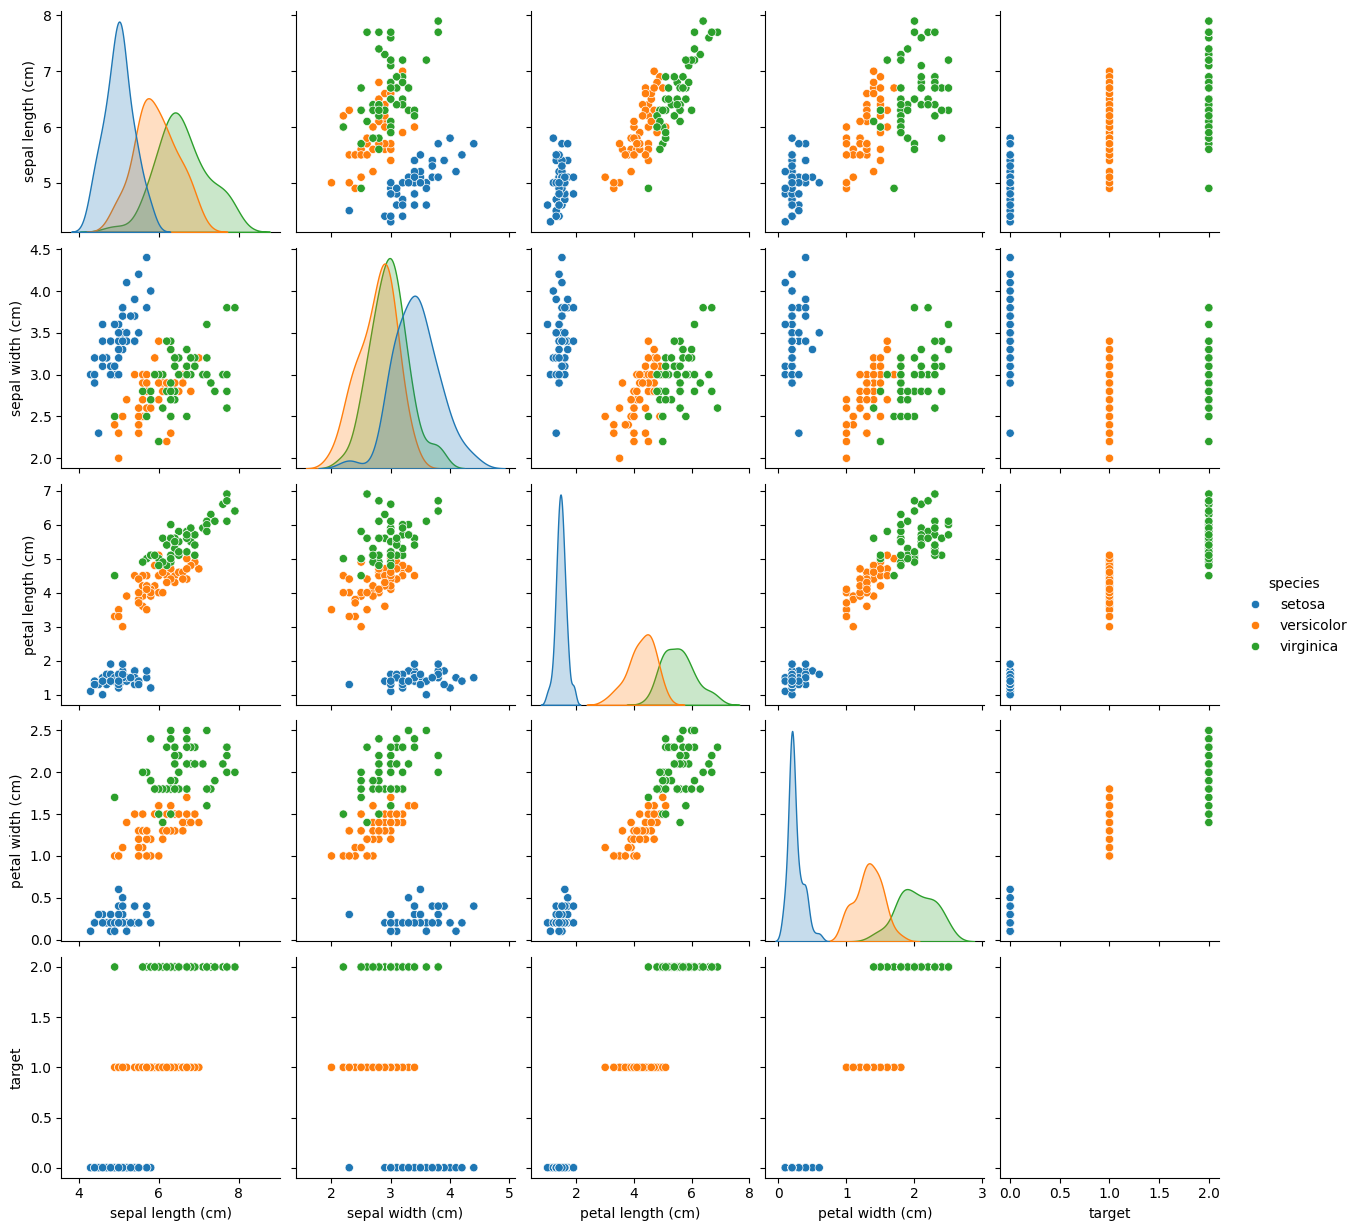

In [5]:
import seaborn as sns
_ = sns.pairplot(data,hue = "species")

In [6]:
features = data[data.columns[:-1]]
    


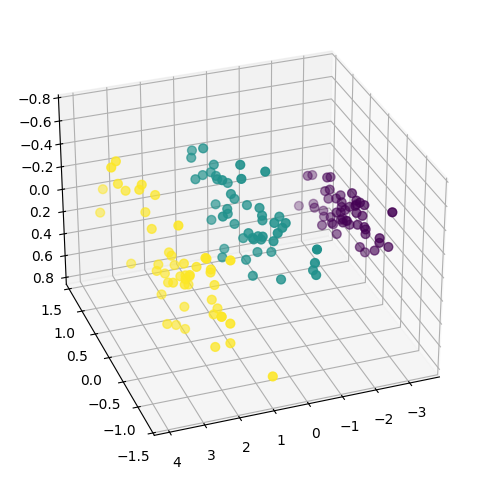

In [7]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

from sklearn.decomposition import PCA

fig = plt.figure(1,figsize = (8,6))
ax = fig.add_subplot(111,projection = "3d",elev = -150, azim = 110)
pca = PCA(n_components = 3)
X_reduced = pca.fit_transform(features)
scatter = ax.scatter(
    X_reduced[:,0],
    X_reduced[:,1],
    X_reduced[:,2],
    c = data.target,
    s = 40
)
data['component_1'] = X_reduced[:,0]
data['component_2'] = X_reduced[:,1]
data['component_3'] = X_reduced[:,2]


In [8]:
print(pca.explained_variance_ratio_)

[0.92264373 0.04812763 0.01826454]


In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,component_1,component_2,component_3
0,5.1,3.5,1.4,0.2,0,setosa,-2.865415,0.296295,0.041871
1,4.9,3.0,1.4,0.2,0,setosa,-2.892047,-0.183785,-0.175541
2,4.7,3.2,1.3,0.2,0,setosa,-3.054980,-0.174827,0.049705
3,4.6,3.1,1.5,0.2,0,setosa,-2.920230,-0.331582,0.003376
4,5.0,3.6,1.4,0.2,0,setosa,-2.906852,0.295917,0.147160


In [10]:
# X = data.iloc[:,[6,7,8]]
X = data.iloc[:,[0,1,2,3]]
y = data.iloc[:,4]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

><h2>KNN algorithm</h2>
>
><b>Approach:</b> Store all of the training data and labels
>
>For a new sample, get the K nearest neighbors by euclidean distance and take majority vote

In [61]:
#Doesnt account for non-pandas dataframes only numpy arrays.
class KNeighborsClassifier():
    def __init__(self,n_neighbors,metric):
        self._n_neighbors = n_neighbors
        self._y = None
        self._X = None
        self._metric = metric

    def fit(self,X,y):
        self._X = X
        self._y = y

    def predict(self,X):
        distances = self._calculate_distances(X)
        sorted_indices = np.argsort(distances, axis = -1)[:,:self._n_neighbors]
        labels = self._y[sorted_indices]
        majority_labels = mode(labels,axis = -1).mode.flatten()
        return majority_labels
    
    #based on distance metric passed into the algorithms
    def _calculate_distances(self,X):
        if(self._metric == 'euclidean'):
            differences = X[:,None] - self._X
            print(differences.shape)
            return np.sum(differences**2,axis = -1)
        
        elif(self._metric == 'manhattan'):
            differences = X[:,None] - self._X
            return np.sum(differences,axis = -1)
        
        elif(self._metric == 'cosine'):
            dot_product = np.dot(X,self._X.T)
            norm_train = np.linalg.norm(self._X,axis = -1)[:,None]
            norm_predict = np.linalg.norm(X,axis = -1)[:,None]
            similarity = dot_product/(norm_predict * norm_train.T)
            distance = 1 - similarity
            return distance

        else:
            print("Metric not supported, reverting to euclidean")
            differences = X[:,None] - self._X
            return np.sum(differences**2,axis = -1)
        
        


In [62]:
knn = KNeighborsClassifier(1,'cosine')
knn.fit(X_train.values,y_train.values)

In [63]:
y_pred = knn.predict(X_test.values)

In [64]:
#Is able to perfectly classify the predictions

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])